# Setup
 OReilly.Hands－On.Machine.Learning.with.Scikit－Learn.and.TensorFlow.2017.3
책을 바탕으로 작성함
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [287]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

 
 
 
 A couple utility functions to plot grayscale and RGB images:

In [288]:
def plot_image(image):
    plt.imshow(image, cmap="gray",  interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# TensorFlow:

In [289]:
import tensorflow as tf

# Use Horizontal Filter
7x7 matrix

In [290]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


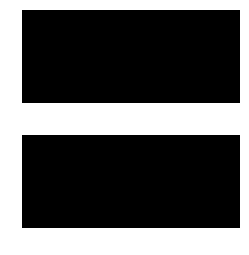

In [302]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
#print(fmap) # 7*7 matrix
fmap[3, :, 0, 1] = 1  # horizontal line 

print(fmap[:, :, 0, 1])
# 7*7 matrix
plot_image(fmap[:, :, 0, 1])
plt.show()

# Use Zero Padding


if you want to use Zero Padding 

option padding='SAME'


if you don't want to use Zero Padding 

option padding = 'VALID'

In [292]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")


Strides = [1,1,1,1] [mini-batch size, height, width, channels].

 So,The first and last elements must currently be equal to 1. 


In [293]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

Saving figure china_original


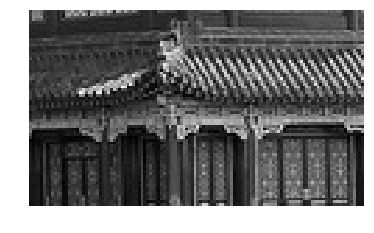

In [294]:
plot_image(images[0, :, :, 0])
save_fig("china_original", tight_layout=False)
plt.show()

Saving figure china_horizontal


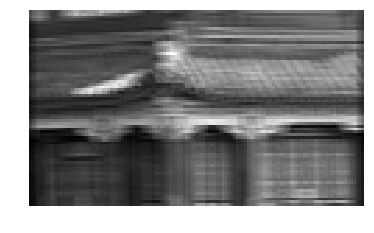

In [297]:
plot_image(output[0, :, :, 1])
save_fig("china_horizontal", tight_layout=False)
plt.show()


Saving figure china_vertical

# We Highligt the Horizontal line

# VALID vs SAME padding


 A mini-batch image data is represented as a 4D tensor of shape [mini-batch size, height, width, channels]
 
 
The weights of a convolutional layer are represented as a 4D tensor of shape [height, width, The number of L-layer's feater maps , The number of ( L-1 )layer's feater maps]


stride  is represented as a 4D tensor of shape [batch size, height, width, channels].


if you want to use Zero Padding 

option padding='SAME'

if you don't want to use Zero Padding 

option padding = 'VALID'


In [298]:
reset_graph()

filter_primes = np.array([1., 2., 2., 0., 0., 0.], dtype=np.float32)



x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))

#print(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
#print(x) # tensor type 으로 만듬

filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

#print(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[ 11.]
   [ 36.]]]]
SAME:
 [[[[  6.]
   [ 31.]
   [ 56.]]]]


Value = 1 ~ 13

Filter = 1 2 2 0 0 

stride = 5



 - VALID ( NO ZERO-PADDING)

1x1 + 2x2 3x2 4x0 5x0 6x0 = 11

6x1 7x2 8x2 9x0 10x0 11x0 = 36

11x1 + 12x2 + 13x2 + NA = NA

so, 11, 36

 - SAME (ADD ZERO-PADDING)


(Zero-padding)x1 + 1x2 + 2x2 + 3x0 +4x0 + 5x0 = 6

5x1 + 6x2 + 7x2 + 8x0 + 9x0 + 10x0 = 31

10x1 11x2 12x2 13x0 (Zero-padding)x 0 (Zero-padding)x 0 = 56







Strides = [1,1,5,1] [mini-batch size, height, width, channels].



In [299]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))


VALID:
11.0
36.0
SAME:
6.0
31.0
56.0


# Pooling layer

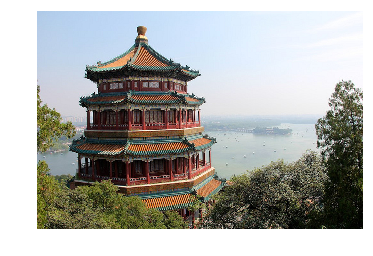

In [300]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
# print((china))
plt.show(plot_image(china))

The ksize argument contains the kernel shape along all four dimensions of the input tensor
: [batch size, height, width, channels].
    

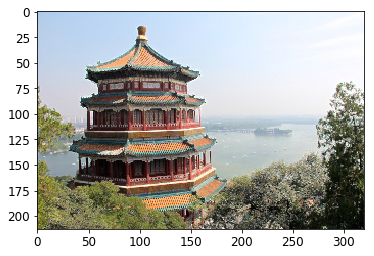

In [301]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

 even with a tiny 2 × 2 kernel and a stride of 2,
 
 the output will be two times smaller in both directions 
 
 (so its area will be four times smaller), simply dropping 75% of the input values.